# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
lat=[]
lon=[]
max_temp=[] 
humidity=[]
cloudiness=[]
wind_speed =[]
country=[]
date=[]
city=[]


In [40]:
number=1
totalcity=len(cities)
for cityname in cities:
    print(f"{number} out of {totalcity} is being processed, Please wait.  Current City: {cityname}")
    number+=1
    query_url=f"http://api.openweathermap.org/data/2.5/weather?q={cityname}&units=imperial&appid={weather_api_key}"
    cityjson=requests.get(query_url).json()
    try:
        lat.append(cityjson["coord"]["lat"])
        lon.append(cityjson["coord"]["lon"])
        max_temp.append(cityjson["main"]["temp_max"])
        humidity.append(cityjson["main"]["humidity"])
        cloudiness.append(cityjson["clouds"]["all"])
        wind_speed.append(cityjson["wind"]["speed"])
        country.append(cityjson["sys"]["country"])
        date.append(cityjson["dt"])
        city.append(cityjson["name"])
    except:
        print(f"Error occured when processing {cityname}, skipping to next entry.")
print("Data Extraction completed.")

1 out of 645 is being processed, Please wait.  Current City: butaritari
2 out of 645 is being processed, Please wait.  Current City: mataura
3 out of 645 is being processed, Please wait.  Current City: vaini
4 out of 645 is being processed, Please wait.  Current City: punta arenas
5 out of 645 is being processed, Please wait.  Current City: ushuaia
6 out of 645 is being processed, Please wait.  Current City: muros
7 out of 645 is being processed, Please wait.  Current City: nhulunbuy
8 out of 645 is being processed, Please wait.  Current City: rawannawi
Error occured when processing rawannawi, skipping to next entry.
9 out of 645 is being processed, Please wait.  Current City: waingapu
10 out of 645 is being processed, Please wait.  Current City: biltine
11 out of 645 is being processed, Please wait.  Current City: avarua
12 out of 645 is being processed, Please wait.  Current City: mbekenyera
13 out of 645 is being processed, Please wait.  Current City: camacha
14 out of 645 is being 

107 out of 645 is being processed, Please wait.  Current City: melipilla
108 out of 645 is being processed, Please wait.  Current City: jalu
109 out of 645 is being processed, Please wait.  Current City: lompoc
110 out of 645 is being processed, Please wait.  Current City: tasiilaq
111 out of 645 is being processed, Please wait.  Current City: bambous virieux
112 out of 645 is being processed, Please wait.  Current City: aksu
113 out of 645 is being processed, Please wait.  Current City: toftir
Error occured when processing toftir, skipping to next entry.
114 out of 645 is being processed, Please wait.  Current City: sioux lookout
115 out of 645 is being processed, Please wait.  Current City: abu samrah
116 out of 645 is being processed, Please wait.  Current City: abu zabad
117 out of 645 is being processed, Please wait.  Current City: kayanza
118 out of 645 is being processed, Please wait.  Current City: beringovskiy
119 out of 645 is being processed, Please wait.  Current City: meul

210 out of 645 is being processed, Please wait.  Current City: trincomalee
211 out of 645 is being processed, Please wait.  Current City: ribeira grande
212 out of 645 is being processed, Please wait.  Current City: hilo
213 out of 645 is being processed, Please wait.  Current City: swan river
214 out of 645 is being processed, Please wait.  Current City: pafos
215 out of 645 is being processed, Please wait.  Current City: thinadhoo
216 out of 645 is being processed, Please wait.  Current City: preston
217 out of 645 is being processed, Please wait.  Current City: koutsouras
218 out of 645 is being processed, Please wait.  Current City: ternate
219 out of 645 is being processed, Please wait.  Current City: lorengau
220 out of 645 is being processed, Please wait.  Current City: sawtell
221 out of 645 is being processed, Please wait.  Current City: ascension
222 out of 645 is being processed, Please wait.  Current City: lagos
223 out of 645 is being processed, Please wait.  Current City:

316 out of 645 is being processed, Please wait.  Current City: emborion
317 out of 645 is being processed, Please wait.  Current City: egvekinot
318 out of 645 is being processed, Please wait.  Current City: leningradskiy
319 out of 645 is being processed, Please wait.  Current City: piacabucu
320 out of 645 is being processed, Please wait.  Current City: skjervoy
321 out of 645 is being processed, Please wait.  Current City: santa cruz
322 out of 645 is being processed, Please wait.  Current City: vallenar
323 out of 645 is being processed, Please wait.  Current City: kenai
324 out of 645 is being processed, Please wait.  Current City: madang
325 out of 645 is being processed, Please wait.  Current City: la ronge
326 out of 645 is being processed, Please wait.  Current City: sinnamary
327 out of 645 is being processed, Please wait.  Current City: emerald
328 out of 645 is being processed, Please wait.  Current City: rabo de peixe
329 out of 645 is being processed, Please wait.  Curren

426 out of 645 is being processed, Please wait.  Current City: kautokeino
427 out of 645 is being processed, Please wait.  Current City: bang saphan
428 out of 645 is being processed, Please wait.  Current City: acri
429 out of 645 is being processed, Please wait.  Current City: samalaeulu
Error occured when processing samalaeulu, skipping to next entry.
430 out of 645 is being processed, Please wait.  Current City: gayny
431 out of 645 is being processed, Please wait.  Current City: saint-dizier
432 out of 645 is being processed, Please wait.  Current City: san borja
433 out of 645 is being processed, Please wait.  Current City: kerteh
Error occured when processing kerteh, skipping to next entry.
434 out of 645 is being processed, Please wait.  Current City: dauphin
435 out of 645 is being processed, Please wait.  Current City: port-gentil
436 out of 645 is being processed, Please wait.  Current City: salinopolis
437 out of 645 is being processed, Please wait.  Current City: mayo
438 

531 out of 645 is being processed, Please wait.  Current City: saint-pierre
532 out of 645 is being processed, Please wait.  Current City: isangel
533 out of 645 is being processed, Please wait.  Current City: nguiu
Error occured when processing nguiu, skipping to next entry.
534 out of 645 is being processed, Please wait.  Current City: jaisalmer
535 out of 645 is being processed, Please wait.  Current City: vestbygda
Error occured when processing vestbygda, skipping to next entry.
536 out of 645 is being processed, Please wait.  Current City: medeiros neto
537 out of 645 is being processed, Please wait.  Current City: lleida
538 out of 645 is being processed, Please wait.  Current City: coari
539 out of 645 is being processed, Please wait.  Current City: atasu
540 out of 645 is being processed, Please wait.  Current City: dawson creek
541 out of 645 is being processed, Please wait.  Current City: tawkar
Error occured when processing tawkar, skipping to next entry.
542 out of 645 is b

632 out of 645 is being processed, Please wait.  Current City: menongue
633 out of 645 is being processed, Please wait.  Current City: batemans bay
634 out of 645 is being processed, Please wait.  Current City: kapoeta
635 out of 645 is being processed, Please wait.  Current City: the valley
636 out of 645 is being processed, Please wait.  Current City: san andres
637 out of 645 is being processed, Please wait.  Current City: bilma
638 out of 645 is being processed, Please wait.  Current City: shihezi
639 out of 645 is being processed, Please wait.  Current City: grand gaube
640 out of 645 is being processed, Please wait.  Current City: mantua
641 out of 645 is being processed, Please wait.  Current City: plackovci
Error occured when processing plackovci, skipping to next entry.
642 out of 645 is being processed, Please wait.  Current City: miedzyrzecz
643 out of 645 is being processed, Please wait.  Current City: takoradi
644 out of 645 is being processed, Please wait.  Current City: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
framedata={"City":city,"Lat":lat,"Lon":lon,"Max Temp (F)":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed (MPH)":wind_speed,
           "Country":country,"Date":date}
citydata_df=pd.DataFrame(framedata)
citydata_df.head(10)


,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed (MPH),Country,Date
0,Butaritari,3.0707,172.7902,83.26,74,91,13.71,KI,1619467461
1,Mataura,-46.1927,168.8643,39.99,89,100,1.01,NZ,1619467105
2,Vaini,-21.2000,-175.2000,75.20,94,75,14.97,TO,1619467389
3,Punta Arenas,-53.1500,-70.9167,44.60,100,90,9.22,CL,1619467394
4,Ushuaia,-54.8000,-68.3000,44.60,81,90,5.21,AR,1619467386
5,Muros,42.7762,-9.0603,57.00,86,56,10.00,ES,1619467630
6,Nhulunbuy,-12.2333,136.7667,77.00,94,75,3.76,AU,1619467631
7,Waingapu,-9.6567,120.2641,73.60,70,45,7.94,ID,1619467631
8,Biltine,14.5333,20.9167,88.48,6,4,9.60,TD,1619467420
9,Avarua,-21.2078,-159.7750,80.60,78,40,4.61,CK,1619467188


In [46]:
citydata_df.describe()
citydata_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [3]:
citydata_df=pd.read_csv(output_data_file)
citydata_df.head()

,Unnamed: 0,Unnamed: 0.1,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed (MPH),Country,Date
0,0,0,Butaritari,3.0707,172.7902,83.26,74,91,13.71,KI,1619467461
1,1,1,Mataura,-46.1927,168.8643,39.99,89,100,1.01,NZ,1619467105
2,2,2,Vaini,-21.2000,-175.2000,75.20,94,75,14.97,TO,1619467389
3,3,3,Punta Arenas,-53.1500,-70.9167,44.60,100,90,9.22,CL,1619467394
4,4,4,Ushuaia,-54.8000,-68.3000,44.60,81,90,5.21,AR,1619467386


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

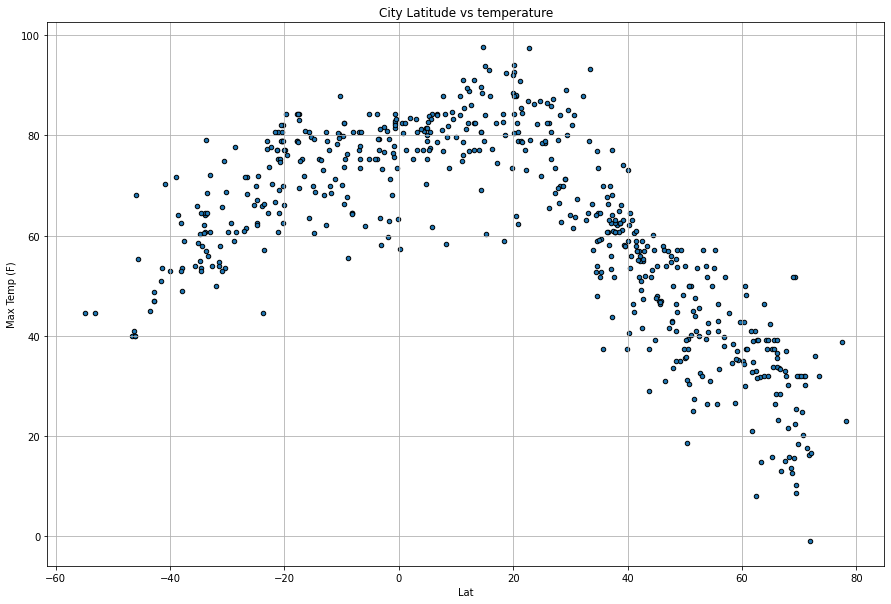

In [63]:
citydata_df.plot(kind="scatter",x="Lat",y="Max Temp (F)",edgecolors="Black",marker="o",figsize=(15,10))
plt.title("City Latitude vs temperature")
plt.grid()
plt.savefig("output_data/fig1.png")
plt.show()


## Latitude vs. Humidity Plot

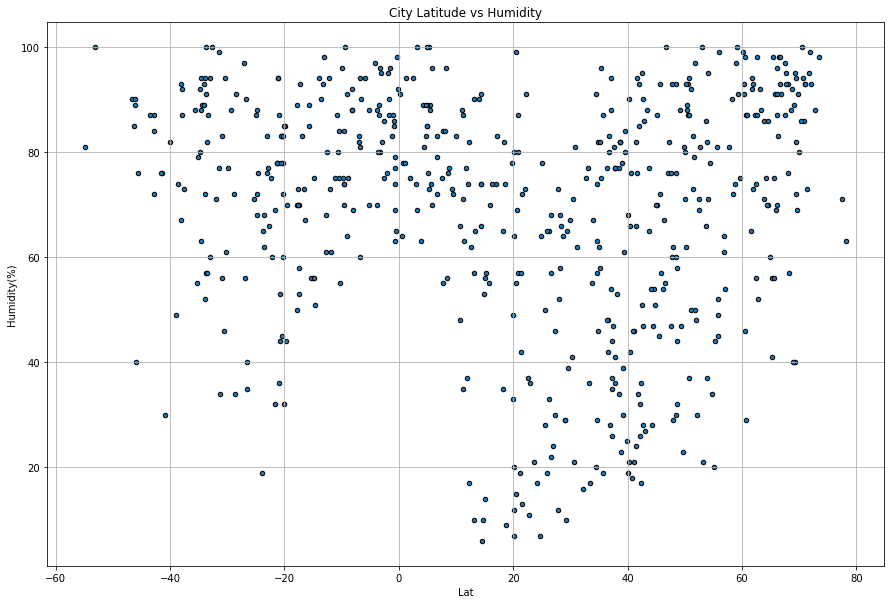

In [69]:
citydata_df.plot(kind="scatter",x="Lat",y="Humidity",edgecolors="Black",marker="o",figsize=(15,10))
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

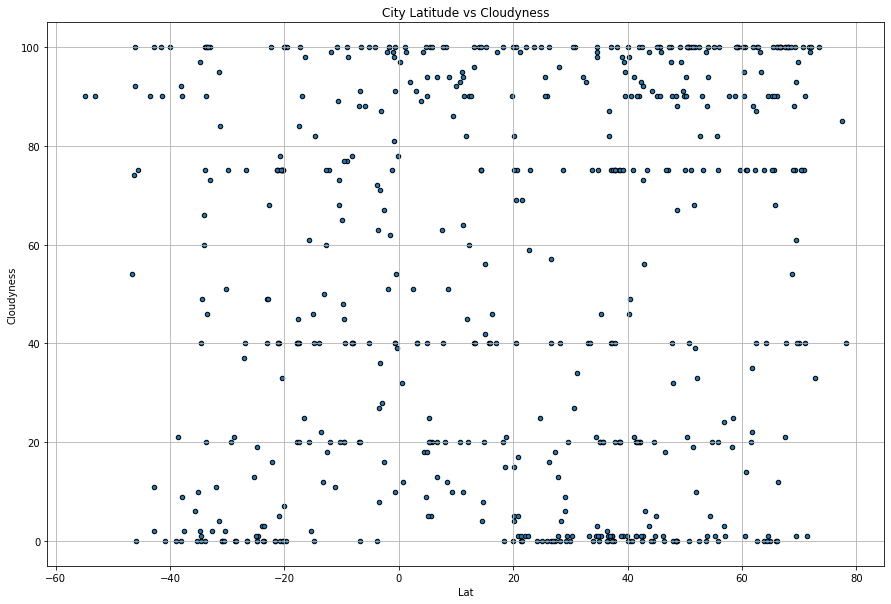

In [70]:
citydata_df.plot(kind="scatter",x="Lat",y="Cloudiness",edgecolors="Black",marker="o",figsize=(15,10))
plt.title("City Latitude vs Cloudyness")
plt.ylabel("Cloudyness")
plt.grid()
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

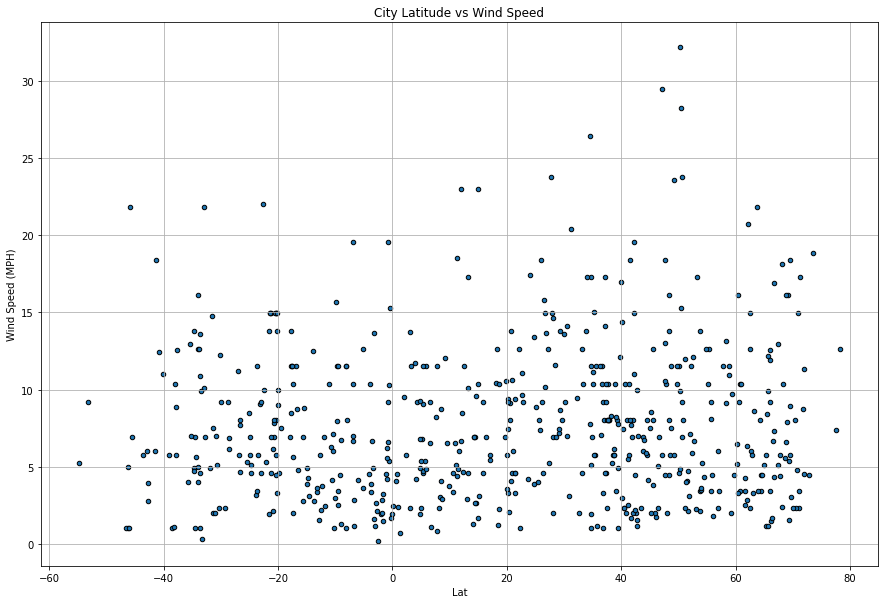

In [73]:
citydata_df.plot(kind="scatter",x="Lat",y="Wind Speed (MPH)",edgecolors="Black",marker="o",figsize=(15,10))
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8830677655994323


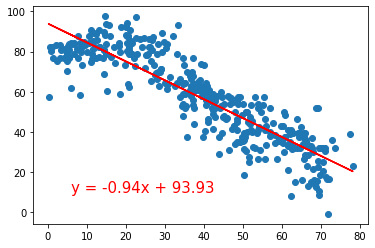

In [6]:
citydata_df_n=citydata_df.loc[citydata_df["Lat"]>0]
x_values = citydata_df_n['Lat']
y_values = citydata_df_n['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6859629131832413


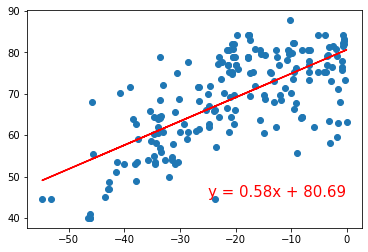

In [15]:
citydata_df_s=citydata_df.loc[citydata_df["Lat"]<0]
x_values = citydata_df_s['Lat']
y_values = citydata_df_s['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19118477968278472


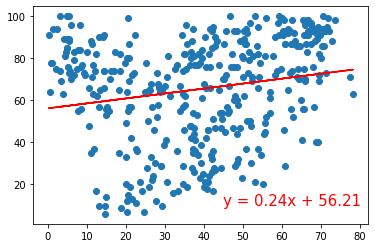

In [18]:
citydata_df_n=citydata_df.loc[citydata_df["Lat"]>0]
x_values = citydata_df_n['Lat']
y_values = citydata_df_n['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10569482280420942


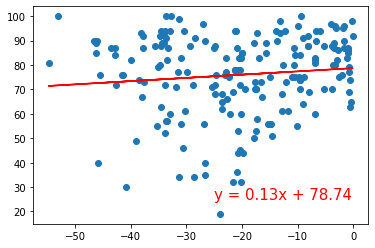

In [20]:
citydata_df_s=citydata_df.loc[citydata_df["Lat"]<0]
x_values = citydata_df_s['Lat']
y_values = citydata_df_s['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1300848919290635


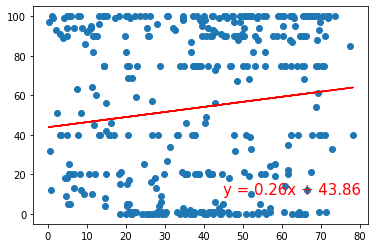

In [21]:
citydata_df_n=citydata_df.loc[citydata_df["Lat"]>0]
x_values = citydata_df_n['Lat']
y_values = citydata_df_n['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11648856823078468


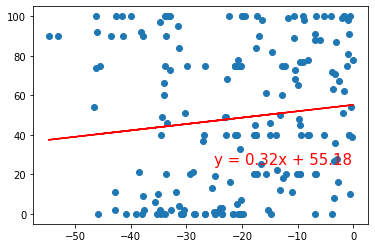

In [22]:
citydata_df_s=citydata_df.loc[citydata_df["Lat"]<0]
x_values = citydata_df_s['Lat']
y_values = citydata_df_s['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05689837684796811


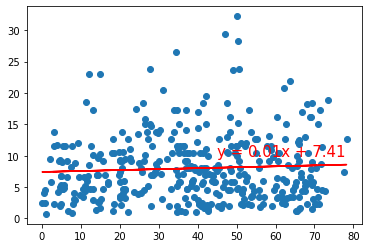

In [23]:
citydata_df_n=citydata_df.loc[citydata_df["Lat"]>0]
x_values = citydata_df_n['Lat']
y_values = citydata_df_n['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11452079459133625


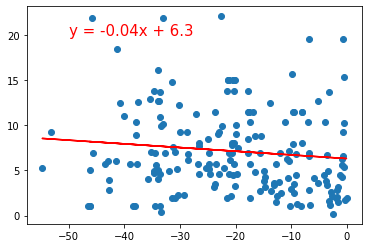

In [26]:
citydata_df_s=citydata_df.loc[citydata_df["Lat"]<0]
x_values = citydata_df_s['Lat']
y_values = citydata_df_s['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()